# Introduction 
Large datasets are increasingly common and are often difficult to interpret. Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance.

PCA is used in exploratory data analysis and for making predictive models. It is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible. The first principal component can equivalently be defined as a direction that maximizes the variance of the projected data. The {\displaystyle i}i-th principal component can be taken as a direction orthogonal to the first {\displaystyle i-1}i-1 principal components that maximizes the variance of the projected data.

<font color = 'blue'>
Content: 

1. [Load and Check Data](#1)
1. [Partition Data](#2)
1. [Scatter Plots & Correlation Coefficients](#3)
1. [Principal Component Analysis](#4)
1. [Orthogonality oF Principal Component](#5)    
1. [Data Preprocessing](#1)   
1. [Prediction With Principal Components](#7)
1. [Multinomianl Logistic Regression Model with PCs](#8) 
1. [Confusion Matrix & Misclassification Error - Training](#9)
1. [Confusion Matrix & Misclassification Error - Testing](#10)
1.  [PCA Advantages & Disadvantages](#11)
    


<a id = "1"></a><br>
# 1. Load and Check Data

In [1]:
data("iris")
str(iris)
# we have 150 obs and 5 variables
# species has 3 factors

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [2]:
# let's see some statistic
summary(iris)
# wee see species has equal obs each

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

<a id = "2"></a><br>
# 2. Partition Data

In [3]:
# PARTITION DATA
set.seed(111)
ind <- sample(2, nrow(iris),
              replace = TRUE,
              prob = c(0.8, 0.2)) # 0.8 for training data, 0.2 test data

In [4]:
training <- iris[ind == 1, ] # training has 120 obs
testing <- iris[ind == 2, ] # test data has 30 obs

In [5]:
str(training)

'data.frame':	120 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [6]:
str(testing)

'data.frame':	30 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.8 5.1 5 4.6 6.5 5.2 5.6 5.9 6.7 ...
 $ Sepal.Width : num  3.5 3.4 3.4 3.5 3.2 2.8 2.7 2.9 3.2 3 ...
 $ Petal.Length: num  1.4 1.9 1.5 1.6 1.4 4.6 3.9 3.6 4.8 5 ...
 $ Petal.Width : num  0.3 0.2 0.2 0.6 0.2 1.5 1.4 1.3 1.8 1.7 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 2 2 2 2 2 ...


<a id = "3"></a><br>
# 3. Scatter Plots & Correlation Coefficients

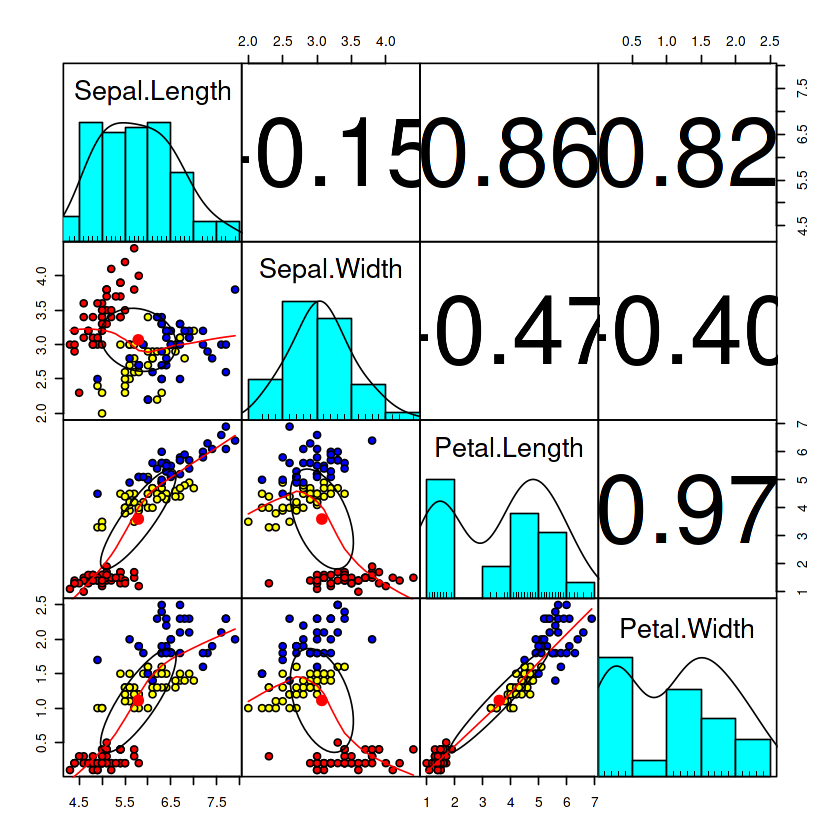

In [7]:
# install.packages("psych")
library(psych)
pairs.panels(training[,-5], # 5 one is factor variable, we'll take it out
             gap = 0, # scatter plot type
             bg = c("red", "yellow", "blue")[training$Species], # each of species color name, you can specify variable here
             pch = 21) # what type of symbol we want

In [8]:
# high correlations among independent variables lead to "Multicollineratiy" problem. For handling this problem, we can use PCA analysis.

<a id = "4"></a><br>
# 4. Principal Component Analysis

In [9]:
pc <- prcomp(training[, -5], # we will take out the dependent variable, PCA analysis we only use independet variables
             center = TRUE, # we want to use center for average for variables 
             scale. = TRUE) # normalization 

In [10]:
# let's check what attributes pc has
attributes(pc)
pc$center # this gives us average of each variables
mean(training$Sepal.Length) # let's check mean, we see the same result for sepal.length


$names
[1] "sdev"     "rotation" "center"   "scale"    "x"       

$class
[1] "prcomp"

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
    5.790000     3.069167     3.597500     1.111667

[1] 5.79

In [11]:
pc$scale
sd(training$Sepal.Length) # when we check sd for sepal.length we get same result


Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
   0.8234382    0.4588615    1.7872782    0.7556158

[1] 0.8234382

In [12]:
print(pc) # we have four variables, and have four principal component results.
# this number goes between -1 and 1 

Standard deviations (1, .., p=4):
[1] 1.7173318 0.9403519 0.3843232 0.1371332

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5147163 -0.39817685  0.7242679  0.2279438
Sepal.Width  -0.2926048 -0.91328503 -0.2557463 -0.1220110
Petal.Length  0.5772530 -0.02932037 -0.1755427 -0.7969342
Petal.Width   0.5623421 -0.08065952 -0.6158040  0.5459403


In [13]:
summary(pc)
# prportion of variance pc1 explain 0.74 variability, pc2 0.22 variability, pc3 and pc4 are not important role in terms of variability
# cumulative proportion pc1 074, pc2 0,96 variablility explain
# first two pcs are important

Importance of components:
                          PC1    PC2     PC3    PC4
Standard deviation     1.7173 0.9404 0.38432 0.1371
Proportion of Variance 0.7373 0.2211 0.03693 0.0047
Cumulative Proportion  0.7373 0.9584 0.99530 1.0000

<a id = "5"></a><br>
# 5. Orthogonality of Principal Component

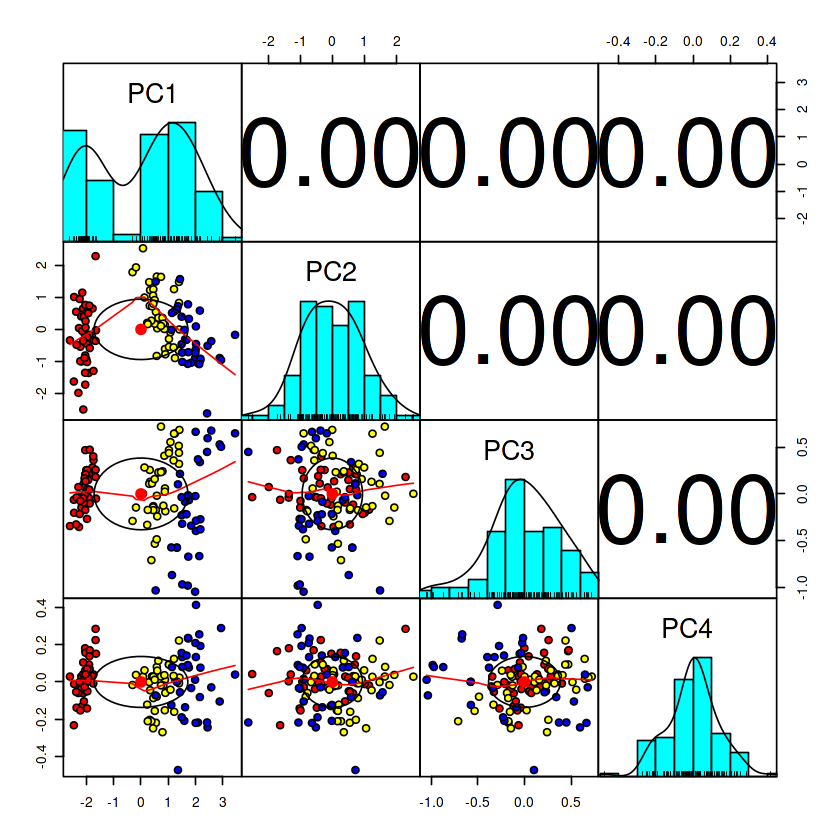

In [14]:
# let's create scatter plot
pairs.panels(pc$x,
            gap = 0,
            bg = c("red", "yellow", "blue")[training$Species],
            pch = 21)

In [15]:
# As we can see there is no correlation anymore, that helps us get rid of "Multicollineratiy" problem

<a id = "6"></a><br>
# 6. Bi Plot

In [16]:
library(devtools)

install_github("vqv/ggbiplot")
library(ggbiplot)


Loading required package: usethis




rlang  (0.4.11 -> 0.4.12) [CRAN]
crayon (1.4.1  -> 1.4.2 ) [CRAN]
cli    (3.0.1  -> 3.1.0 ) [CRAN]
pillar (1.6.3  -> 1.6.4 ) [CRAN]


Installing 4 packages: rlang, crayon, cli, pillar

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘rlang’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘crayon’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘pillar’ had non-zero exit status”


✔  checking for file ‘/tmp/RtmpbqeCKg/remotese3d2aa9bc/vqv-ggbiplot-7325e88/DESCRIPTION’
─  preparing ‘ggbiplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggbiplot_0.55.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha


Loading required package: plyr

Loading required package: scales


Attaching package: ‘scales’


The following objects are masked from ‘package:psych’:

    alpha, rescale


Loading required package: grid



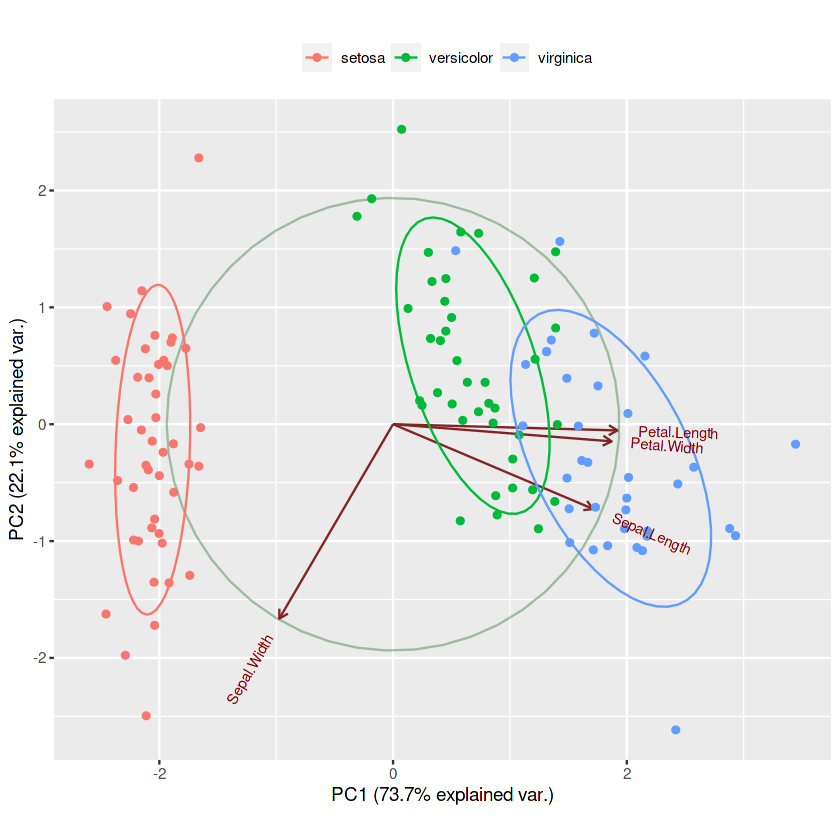

In [17]:
g <- ggbiplot(pc,
              obs.scale = 1,
              var.scale = 1,
              groups = training$Species,
              ellipse = TRUE, # elipse around the daha point
              circle = TRUE,# circle by the plot
              elipse.prob = 0.68) # this is the elipse size, if it is adjusted bigger, elipse will be larger, 0.68 is default value
# we will add some more layer on g
g <- g + scale_color_discrete(name = "")
g <- g + theme(legend.direction = "horizontal",
               legend.position = "top")
print(g)

In [18]:
# As we can see x axis PC1 explains 74.2%, y axis PC2 explains 22.1% variability
# Also we see four arrows, each represents the variables in the data set.
# petal lenght and petal width are very close, they are high correlation. Also Sepal Length has high correlation these two variables. Sepal Width is low correlation.
# These high correlated variables are on the right side, which is positive values.
# Biplot is very importtan plot for PCA analysis


<a id = "7"></a><br>
# 7. Prediction With Principal Components

In [19]:
# PREDICTION WITH PRINCIPAL COMPONENTS
trg <- predict(pc, training)
trg <- data.frame(trg, training[5])
tst <- predict(pc, testing)
tst <- data.frame(tst, testing[5])


<a id = "8"></a><br>
# 8. Multinomianl Logistic Regression Model with PCs

In [20]:
library(nnet)
trg$Species <- relevel(trg$Species, ref = "setosa") # setosa is our first references
mymodel <- multinom(Species~PC1+PC2, data = trg)
summary(mymodel)

# weights:  12 (6 variable)
initial  value 131.833475 
iter  10 value 20.607042
iter  20 value 18.331120
iter  30 value 18.204474
iter  40 value 18.199783
iter  50 value 18.199009
iter  60 value 18.198506
final  value 18.198269 
converged


Call:
multinom(formula = Species ~ PC1 + PC2, data = trg)

Coefficients:
           (Intercept)      PC1      PC2
versicolor   7.2345029 14.05161 3.167254
virginica   -0.5757544 20.12094 3.625377

Std. Errors:
           (Intercept)      PC1      PC2
versicolor    187.5986 106.3766 127.8815
virginica     187.6093 106.3872 127.8829

Residual Deviance: 36.39654 
AIC: 48.39654 

<a id = "9"></a><br>
# 9. Confusion Matrix & Misclassification Error - Training 

In [21]:
p <- predict(mymodel, trg)
tab <- table(p, trg$Species)
tab

1 - sum(diag(tab)) / sum(tab) # misslassication error / percent


            
p            setosa versicolor virginica
  setosa         45          0         0
  versicolor      0         35         3
  virginica       0          5        32

[1] 0.06666667

<a id = "10"></a><br>
# 10. Confusion Matrix & Misclassification Error - Testing

In [22]:
p1 <- predict(mymodel, tst)
tab1 <- table(p1, tst$Species)
tab1


1 - sum(diag(tab)) /  sum(tab1) # missclassification error for testing data

            
p1           setosa versicolor virginica
  setosa          5          0         0
  versicolor      0          9         3
  virginica       0          1        12

[1] -2.733333

<a id = "11"></a><br>
# 11. PCA Advantages & Disadvantages

In [23]:
# PCA ADVANTAGES
# Useful for dimension reduction for high-dimensional data analysis
# Helps reduce the number of predictor items using principal components.
# Helps to make predictor items indipendent & avoide multicollinearity problem
# Allows interpretation of many variables using a 2-dimensional biplot
# Can be used for developing prediction models

# PCA DISADVANTAGES
# Only numeric variables can be used.
# Prediction models are less interpretable.